# The first part of the assignment, IDS 2020-2021
In this Jupiter notebook, please, document your results and the way you have obtained them. Please use the _Python environment_ provided at the beginning of the course. In addition to the _Jupiter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupiter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification and simplification. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1.
    
    2. 
    
    3. Shahid Khan

## Preprocessing of the Dataset (5 points)
 Carry out the following preprocessing steps before starting the analysis:
 - Select 90% of dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the new generated dataset (which contains 90% of the data) to "sampled_data".
 - <font color='red'>Important!</font>  Export your *sampled_data* dataset and submit it with your assignment solution.
 - If it is not otherwise mentioned, you should always use your below created *sampled_data* as input for the questions.

In [186]:
import pandas as pd
import numpy as np
complete_data = pd.read_csv("dataset.csv")
# define seed for random generator
shahid = 3
# Return 90 % rows of given data set
sampled_data = complete_data.sample(n = int(0.9*complete_data.shape[0]), 
                                    replace = False,
                                    random_state = np.random.RandomState(seed=shahid),
                                    axis = 'index')
# save the returned data in csv file
sampled_data.to_csv('sampled_data.csv')
print("File generation done...")
print(sampled_data.shape)

File generation done...
(170, 22)


## Question 1 - Insights into the Data (15 points):

   (a)  Generate a dataset by removing those rows of the sampled_data dataset for which the value of "SurfaceR" is equal or bigger than 50000. Let's call this data set "new_sampled_data".

In [103]:
# To keep every cell independent of others, we will import files and load data sets for each question.
import pandas as pd
sampled_data = pd.read_csv('sampled_data.csv')
# Sort the frame first for better visibility
sorted_frame = sampled_data.sort_values('SurfaceR', ascending=True)
# we return all values less than the threshold
new_sampled_data = sorted_frame[sorted_frame.SurfaceR < 50000]
new_sampled_data.to_csv('new_sampled_data.csv')
print('new_sampled_data.csv written....')


new_sampled_data.csv written ....


   (b)  Use a boxplot to find and remove the outliers from "SurfaceR". Note that based on the boxplot the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers. Let's call the dataset after removing the outliers "cleaned_data". Now you should  have three datasets (sampled_data, new_sampled_data, and cleaned_data). 

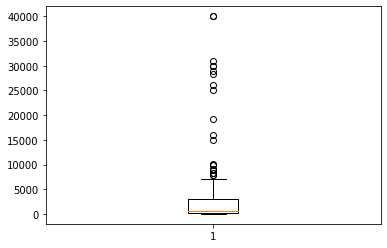

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
new_sampled_data = pd.read_csv('new_sampled_data.csv')
bp = plt.boxplot(new_sampled_data['SurfaceR'])
# now we gt. whisker values
[lower_whisker, upper_whisker] = [item.get_ydata()[1] for item in bp['whiskers']] #visit this apprach later
intermediate_data = sampled_data[sampled_data.SurfaceR >= lower_whisker]
cleaned_data = intermediate_data[intermediate_data.SurfaceR <= upper_whisker]
cleaned_data.to_csv('cleaned_data.csv')

   (c) Compare basic statistical features of "SurfaceR" (median, mean, and mode, standard deviation, variance) in the new_sampled_data and cleaned_data datasets.    Interpret the differences for these statistical values between the cleaned_data and new_sampled_data datasets. Explain why the statistics of these two datasets are different.

In [174]:
import numpy as np
from statistics import mode
data  = {'new_sampled_data': [np.median(new_sampled_data['SurfaceR']),
                                np.mean(new_sampled_data['SurfaceR']),
                                mode(new_sampled_data['SurfaceR']),
                                np.std(new_sampled_data['SurfaceR']),
                                np.var(new_sampled_data['SurfaceR'])],
          'cleaned_data'     : [np.median(cleaned_data['SurfaceR']),
                                np.mean(cleaned_data['SurfaceR']),
                                mode(cleaned_data['SurfaceR']),
                                np.std(cleaned_data['SurfaceR']),
                                np.var(cleaned_data['SurfaceR'])]}
Statistics = pd.DataFrame.from_dict(data, orient='index',columns=['median','mean','mode','std','var'])
print(Statistics)



                  median         mean  mode          std           var
new_sampled_data   600.0  3622.743902   300  7403.826493  5.481665e+07
cleaned_data       475.0  1231.197183   300  1589.835000  2.527575e+06


No of rows in new sampled data: 164
No of rows in cleaned data: 142


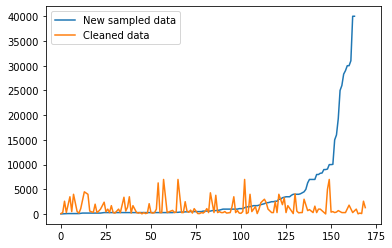

In [189]:
plt.plot(new_sampled_data['SurfaceR'],label='New sampled data')
plt.plot(cleaned_data['SurfaceR'],label='Cleaned data')
plt.legend()
print("No of rows in new sampled data:", new_sampled_data['SurfaceR'].shape[0])
print("No of rows in cleaned data:", cleaned_data['SurfaceR'].shape[0])

Explanation: The reason of discrepancy for each metric is as under:\
<b> Medain:</b> The number of rows in both data based is different, which gives us different values of median.\
<b> mean:</b> 
    As we have stripped otliers from the <em>new sampled data</em> to obtain <em>cleaned data</em>, the mean of <em>cleaned data</em> is low.\
<b> mode:</b> As extreme values are removed, mode of both databases remain the same.\
<b> standard deviation:</b> removing otliers also reduce the variation of data. So, standard deviation of cleaned data is also low.
<b> Variance:</b> A reduction in standard deviation also result in the reduced variance.


### Basic Visualization (10 points)
(d) Visualize mean and median of "SurfaceR" in the cleaned dataset. Specify the "Surroundings3" values for which the mean and median of "SurfaceR" is maximal and for which it is minimal.

The mean of SurfaceR is:  1231.1971830985915
The mean of SurfaceR is:  475.0


{'whiskers': [<matplotlib.lines.Line2D at 0x12128a650>,
 'caps': [<matplotlib.lines.Line2D at 0x124d03bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12128a150>],
 'medians': [<matplotlib.lines.Line2D at 0x123ee2690>],
 'fliers': [<matplotlib.lines.Line2D at 0x122f21f50>],
 'means': []}

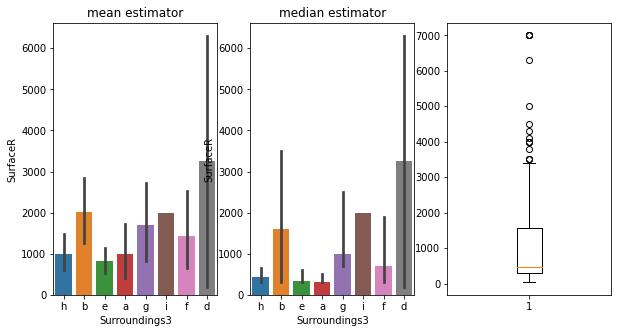

In [208]:
import seaborn as sns
fig, axes = plt.subplots(1, 3,figsize=(10,5))
print("The mean of SurfaceR is: ",np.mean(cleaned_data['SurfaceR']))
print("The mean of SurfaceR is: ", np.median(cleaned_data['SurfaceR']))
sns.barplot(ax=axes[0],x="Surroundings3", y = "SurfaceR", data = cleaned_data, estimator=np.mean)
sns.barplot(ax=axes[1],x="Surroundings3", y = "SurfaceR", data = cleaned_data, estimator=np.median)
axes[0].set_title("mean estimator")
axes[1].set_title("median estimator")

axes[2].boxplot(cleaned_data['SurfaceR'])

Explanation:\
<b>Maximum:</b> Both mean and median values are maximal for d.\
<b>Minimum:</b> mean is minimal for e and median is minimal for a.

   (e) Plot the distribution of "SurfaceR" in the new_sampled_data and cleaned_data datasets.

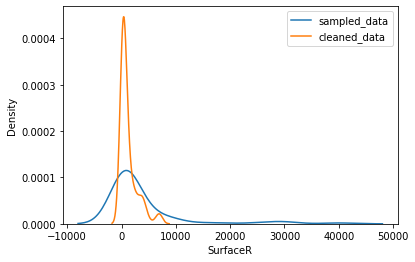

In [257]:
ax = sns.kdeplot(x=new_sampled_data["SurfaceR"],label="sampled_data",legend=True)
sns.kdeplot(x=cleaned_data["SurfaceR"], axes=ax,label="cleaned_data",legend=True)
plt.legend()

   (f) Explore the distribution of "SurfaceR" and "AcessR" together in the new_sampled_data and cleaned_data datasets. Specify the ranges of "SurfaceR" and "AcessR" for which the frequency of the data is the highest.

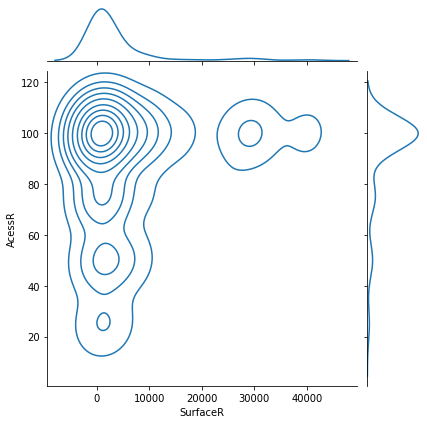

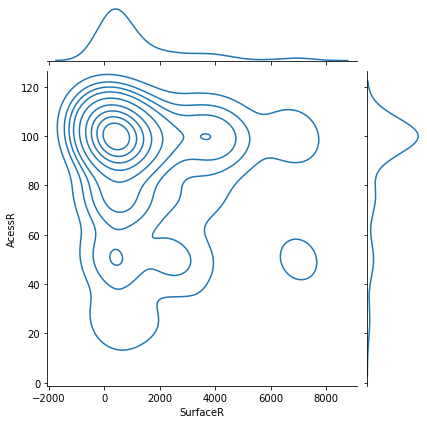

In [264]:
sns.jointplot(data=new_sampled_data, x="SurfaceR", y="AcessR", kind="kde");
sns.jointplot(data=cleaned_data, x="SurfaceR", y="AcessR", kind="kde");

Explanation:

For both datasets, the highest frequency happens when AcessR=100 and SurfaceR=0.

## Question 2 - Decision Trees (15 points):

   (a) Add a categorical column "number_frogs" to the new_sampled_data which indicate the number of different frogs in each region (row). For example, if in a row we have:
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 0, "Common newt" = 0, and "Great crested newt" = 0, then "number_frogs" = 'two'.
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 1, "Common newt" = 1, and "Great crested newt" = 0, then "number_frogs" = 'four'.

In [270]:
import pandas as pd
new_sampled_data = pd.read_csv('new_sampled_data.csv')
new_sampled_data['number_frogs'] = new_sampled_data['Green frogs'] + new_sampled_data['Brown frogs'] + new_sampled_data['Common toad'] + new_sampled_data['Fire-bellied toad'] +  new_sampled_data['Tree frog'] + new_sampled_data['Common newt'] + new_sampled_data['Great crested newt']

     Unnamed: 0  Unnamed: 0.1   ID  SurfaceR  NumberR TypeR  VegetationR  \
0           147            49   50        30        1     a            2   
1            45           108  109        50        1     a            2   
2           165            60   61        50        1     a            2   
3           129            75   76       100        1     a            2   
4            47            42   43       100        1     g            4   
..          ...           ...  ...       ...      ...   ...          ...   
159         145            28   29     30000        1     a            3   
160          23            15   16     30000        1     a            3   
161         112            44   45     31000        6     a            0   
162          66           136  137     40000        4     a            1   
163          31            47   48     40000        1     a            1   

    Surroundings1 Surroundings2 Surroundings3  ...  PollutionR   ShoreR  \
0           

   (b) In the new dataset (created in Section 'a'), consider "TypeR", "VegetationR", "Surroundings1", "Surroundings2", "Surroundings3" as    the descriptive features and "number_frogs" as the target feature. Generate two decision trees. Let's call them "tree1" and "tree2". In tree1 set the minimum number of samples for splitting to 15 and in tree2 set the minimum number of samples for splitting to 1. Create both decision trees based on entropy.

In [307]:
from p_decision_tree.DecisionTree import DecisionTree
descriptive_features = ['TypeR','VegetationR','Surroundings1','Surroundings2','Surroundings3']
data_descriptive = new_sampled_data[descriptive_features].astype(str).values
data_label = new_sampled_data['number_frogs'].astype(str).values
# print(descriptive_features)
tree1 = DecisionTree(data_descriptive.tolist(), descriptive_features, data_label.tolist(), "entropy")
tree2 = DecisionTree(data_descriptive.tolist(), descriptive_features, data_label.tolist(), "entropy")
# gain threshold and minimum samples
tree1.id3(0,15)
tree2.id3(0,1)
dot = tree1.print_visualTree( render=True )
dot2 = tree2.print_visualTree( render=True )

   (c) Consider tree1. What is the best attribute (based on entropy) for splitting the tree in the second round of ID3 regarding the value of the attribute chosen in the first round of ID3?    

Explanation: 

   (d) Compare tree1 and tree2 in terms of the possibility of overfitting and the complexity of the decision trees.

Explanation:

## Question 3 - Regression (14 points):

For this question (Q3), create and use a restricted dataset by removing the columns "ID", "NumberR", "Surrounding1", "Surrounding2", "Surrounding3", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt" from the sampled_data.

In this question, we consider "Green frogs" and "Brown frogs" to be potential target features, while all other features are potential descriptive features.

In [ ]:
# Your code

   (a) Which features are suitable as input for logistic regression? Which would need to be modified first? Explain your answers.

In [ ]:
# Your code

Explanation:

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows. 

Explanation:

In [ ]:
# Your code

(c) We want to predict the presence of green frogs and brown frogs in the habitat, using a distinct logistic regression classifier for each frog type. 

Consider the set of features available in this question's unmodified data set (that is before Q3b). To get an overview of the data, choose and present some basic visualization as discussed in the lectures (e.g.  scatter matrix, scatter plots, charts, etc.). Based on this visualization, for each frog type choose the 4 most promising descriptive features to predict the presence of that frog type in the habitat. 

Explain your strategy and choices.

In [ ]:
# Your code

Explanation: 

   (d) For both frog types, train a logistic regression classifier to predict the presence of that frog type in the habitat. Use the descriptive features as chosen in Q3c. Apply the modification from Q3b if needed.

In [ ]:
# Your code

   (e) For each of the two trained classifiers compute and print the confusion matrix.

In [ ]:
# Your code

(f) Based on the information computed in Q3 so far, interpret and evaluate the two models and compare them. Why are they similar/different? Would you recommend the models and why (not)? How do you think the applied methods could be improved to get better results?

Explanation: 

## Question 4 - Support Vector Machines (8 points):

For this question (Q4), restrict your data set to the same features as in Q3. Similar to Q3, we want to train two distinct classifiers predicting the presence of green frogs and brown frogs in the habitat. 

In this question, we will use SVMs instead of logistic regression. In the following, consider *Green frogs* and *Brown frogs* to be potential target features, while all other features are potential descriptive features.

In [ ]:
# Your code

   (a) Which of the potential descriptive features are suitable as an input for SVMs and which need to be modified first? Modify the data as needed and provide a brief explanation. Print the first two data rows of the modified data set.

In [ ]:
# Your code

Explanation:

   (b) For each frog type, consider the same set of 4 descriptive features as chosen in Q3 c). Generate for both target features a training and test set based on all data rows (for example, consider the sampling strategies as explained in the lecture) of the restricted data set. Briefly explain and motivate the choice of the sampling strategy as well as the size of the training and test set.

In [ ]:
# Your code

Explanation:

   (c) Use the training set to train 4 different SVMs (2 per frog type) with different parameter combinations. Use at least two distinct values for the parameters *kernel* and *C*.

*Hint: depending on the size of the training data and chosen parameters, training the SVMs may take some time.*

In [ ]:
# Your code

   (d) Compute and print the mean accuracy and the classification report of the trained SVMs with respect to the test set (see instruction for examples).

   (e) Based on the information computed in Q4 so far, interpret and evaluate the 4 SVMs and compare them. Why are they similar/different? Would you recommend using these SVMs and why (not)?

Explanation:


## Question 5 - Neural Networks (15 points)
In this question consider the sampled_data, which is the dataset that you have created in the *Preprocessing of Dataset* section. The target features are the *different frogs*.

   (a) What are the possible inputs of your network?
   
     - Give the number of possible values of the different categorical inputs.
     - Give the number of possible input patterns for the categorical data..

In [ ]:
# Your code

Explanation:

   (b) Choose one categorical feature and two non-categorical features as input features. Create a data set with those features and the target columns (different frogs). Name this data set *NN_data*.

In [ ]:
# the student should choose -> results differ

   (c) Convert the features that need to be converted using One-Hot-Encoding. Explain why you need (not) to convert these features. Name the data set *NN_data_encoded*.

Explanation:

In [ ]:
# Your code

   (d) Create a training and test set with 90% of the rows of your *NN_data_encoded* data set for training and 10% as test data set. Name them *train_NN* and *test_NN*

In [ ]:
# Your code

   (e) Train two different Neural Networks, one with a linear activation function and one with a non-linear activation function. All other settings stay default. Give the accuracy of each Neural Network for the training and test set (*train_NN* and *test_NN*. Which activation function seems to be better?

In [ ]:
# (linear activation function):

In [ ]:
#  (non-linear activation function):

Explanation:

   (f) Based on your result of (e) train 2 more Neural Networks with different settings (change at least 4 parameters (2 each)). Explain your parameters and the choice of the activation function. Evaluate the different Neural Networks with your test set by giving the accuracy. Try to increase the accuracy and analyse the factors that prohibit better accuracy.

In [ ]:
# code for 2 more NN

Explanation:

## Question 6 - Evaluation (10 Points)

   (a) Consider two models of question 5 of your choice with the respective datasets (training and test data).

- Create training and test data for 3-fold cross validation.

In [ ]:
# Your code

- Print confusion matrices on the training data and the cell-by-cell summation of the results.

In [ ]:
# Your code for the confusion matrices on the training data

- Print the cell-by-cell summation of the confusion matrices on the test data.

In [ ]:
# Your code for the confusion matrices on the test data

- Print the precision, recall and f1-scores on the test data for each fold and model. Give the unaggregated results.

In [ ]:
# Your code for precision, recall and F1-scores on the test data

- Compute accuracy scores on training and test data (give explicitly the result for each fold).

In [ ]:
# Your code for accuracy scores on training and test data

In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the **questions 2 through 5** of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the findings above.

Explanation:

   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the findings above.

Explanation:

## Question 7 - Clustering (8 points): 

(a) For this question, use the extracted data set you created in the preprocessing step (sampled_data). Drop all the columns expect "VegetationR", "UseR", "FishingR", "RoadDistanceR", "BuildingR", "RoadDistanceR", and "PollutionR". Use a dendogram to find the overview of the clusters that you can extract for the remaining columns.

In [ ]:
# Your code

(b) What does the vertical and horizontal axis show in the dendogram? Why the distance between the clusters in the dendogram generally decreases, when we go from top to down in the dendogram?

(c) Split the diagram at 3 and find the number the clusters at this point.

In [ ]:
# Your code

(d) Using agglomerative clustering with the number of clusters found in the previous section and a scatter diagram, show the discovered cluster for "VegetationR" and "UseR" in different colors. 

In [ ]:
# Your code